# Predicting used car prices

## Data cleaning

### Data discovery

In [148]:
import pandas as pd
import numpy as np

rows = pd.read_csv("vehicles.csv", nrows=100)
rows.to_csv('original_data_chunk.csv', mode='w', header=True)

column_names = pd.read_csv("vehicles.csv", nrows=1).head()
for column_name in column_names:
    print(column_name)

id
url
region
region_url
price
year
manufacturer
model
condition
cylinders
fuel
odometer
title_status
transmission
vin
drive
size
type
paint_color
image_url
description
county
state
lat
long


### Removing useless columns

In [149]:
columns = ["price", "year", "manufacturer", "model", "condition", "cylinders", "fuel", "odometer", "title_status", "transmission", "drive", "size", "type", "paint_color"]
data = pd.read_csv("vehicles.csv", nrows=100)
data = data[columns]
data.to_csv('sensible_column_data_chunk.csv', mode='w', header=True)

### Cleaning obvious outliers and rows with missing values of important columns

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

def condition_match_percent(column, condition):    
    count = column.shape[0]
    con_match_count = column.query(condition).shape[0]
    match_percent = con_match_count * 100 / count
    print("   " + str(column.columns.values[0]) + "   ")
    print("total count: " + str(count))
    print("matching condition count: " + str(con_match_count))
    print("not matching condition count: " + str(count - con_match_count))
    print("matching condition percentage: " + str(match_percent))
    print("not matching condition percentage: " + str(100 - match_percent))

def missing_value_percentage(data):
    percent_missing = data.isnull().sum() * 100 / len(data)
    missing_value_percentage = pd.DataFrame({'percent_missing': percent_missing})
    missing_value_percentage.sort_values('percent_missing', inplace=True)
    print(missing_value_percentage)

def reject_outliers(data, column):
    u = np.median(data[column])
    s = np.std(data[column])
    top = u + 2 * s
    bottom = u - 2 * s
    return data.query("@bottom < {0} < @top".format(column), engine="python")

data = pd.read_csv("vehicles.csv", nrows=10000)
data = data[columns]

#### Removing "price" column obvious outliers and rows with missing "price" values

              percent_missing
price                    0.00
year                     0.19
transmission             0.57
fuel                     0.68
title_status             0.81
model                    1.08
manufacturer             3.98
odometer                17.22
type                    22.60
drive                   24.69
paint_color             33.44
cylinders               38.39
condition               43.50
size                    72.02

   price   
total count: 10000
matching condition count: 8667
not matching condition count: 1333
matching condition percentage: 86.67
not matching condition percentage: 13.329999999999998


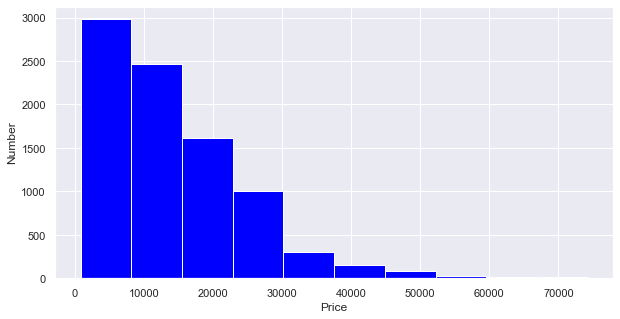

In [151]:
missing_value_percentage(data)
print()
condition_match_percent(data[["price"]], "100000 > price > 750")
#print("\n" + str(data["price"].head(10)))

plt.figure(figsize=(10,5))
plt.xlabel("Price")
plt.ylabel("Number")
plt.hist(data[["price"]].query("80000 > price > 800")["price"], bins=10, color='blue')
plt.show()
data = data.query("80000 > price > 0")

#### Removing "odometer" column obvious outliers and rows with missing "odometer" values

              percent_missing
price                0.000000
year                 0.203413
transmission         0.519833
fuel                 0.598938
title_status         0.870155
model                1.130071
manufacturer         3.932648
odometer            16.114815
type                22.522319
drive               25.528308
paint_color         31.235168
condition           38.671036
cylinders           38.727540
size                71.070177

   odometer   
total count: 8849
matching condition count: 7336
not matching condition count: 1513
matching condition percentage: 82.90202282743813
not matching condition percentage: 17.09797717256187


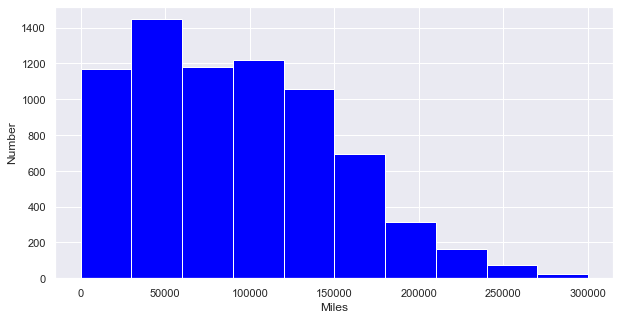

In [152]:

missing_value_percentage(data)
print()
condition_match_percent(data[["odometer"]], "300000 > odometer > 10")
#print("\n" + str(data["odometer"].head(10)))

plt.figure(figsize=(10,5))
plt.xlabel("Miles")
plt.ylabel("Number")
plt.hist(data[["odometer"]].query("300000 > odometer > 10")["odometer"], bins=10, color='blue')
plt.show()
data = data.query("300000 > odometer > 10")

#### Removing "year" column obvious outliers and rows with missing "year" values

              percent_missing
price                0.000000
odometer             0.000000
year                 0.231734
transmission         0.586150
fuel                 0.627045
model                0.831516
title_status         0.967830
manufacturer         2.971647
type                13.726827
drive               18.756816
paint_color         24.741003
condition           35.250818
cylinders           35.373501
size                69.860960

   year   
total count: 7336
matching condition count: 7245
not matching condition count: 91
matching condition percentage: 98.75954198473282
not matching condition percentage: 1.2404580152671798


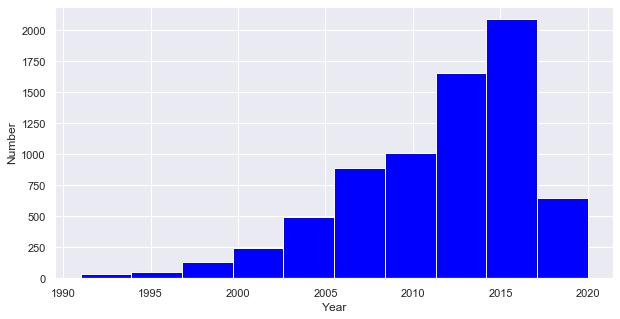

In [153]:
missing_value_percentage(data)
print()
condition_match_percent(data[["year"]], "year > 1990")
#print("\n" + str(data["year"].head(10)))

plt.figure(figsize=(10,5))
plt.xlabel("Year")
plt.ylabel("Number")
plt.hist(data[["year"]].query("year > 1990")["year"], bins=10, color='blue')
plt.show()
data = data.query("year > 1990")

### Analysing missing values

In [154]:
def missing_value_percentage(data):
    percent_missing = data.isnull().sum() * 100 / len(data)
    missing_value_percentage = pd.DataFrame({'percent_missing': percent_missing})
    missing_value_percentage.sort_values('percent_missing', inplace=True)
    print(missing_value_percentage)
    
data[0:100].to_csv('missing_value_analyse_data_chunk.csv', mode='w', header=True)
missing_value_percentage(data)
print("\ntotal rows count: " + str(data.shape[0]))

              percent_missing
price                0.000000
year                 0.000000
odometer             0.000000
transmission         0.593513
fuel                 0.634921
model                0.814355
title_status         0.938578
manufacturer         2.594893
type                13.733609
drive               18.743961
paint_color         24.803313
condition           35.334714
cylinders           35.707384
size                70.048309

total rows count: 7245


#### Droping rows with missing important column values

In [155]:
data = data.query("model.notnull() and manufacturer.notnull()", engine="python")
data[0:100].to_csv('missing_value_analyse_data_chunk.csv', mode='w', header=True)
missing_value_percentage(data)
print("\ntotal rows count: " + str(data.shape[0]))

              percent_missing
price                0.000000
year                 0.000000
manufacturer         0.000000
model                0.000000
odometer             0.000000
transmission         0.600171
fuel                 0.628751
title_status         0.957416
type                13.703915
drive               18.791083
paint_color         24.535582
condition           34.838525
cylinders           36.024578
size                70.305802

total rows count: 6998


#### Analysing missing values for "title_status" column

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

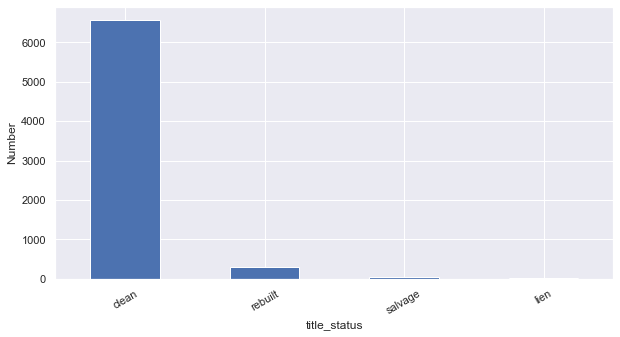

In [156]:
plt.figure(figsize=(10,5))
plt.xlabel("title_status")
plt.ylabel("Number")
title_status = data[["title_status"]].query("title_status.notnull()", engine="python")["title_status"].value_counts()
title_status.plot(kind="bar")
plt.xticks(rotation=30)

#### Replacing missing values of "title_status" column with most popular value

In [157]:
data = data.fillna(value={ "title_status":"clean" })
missing_value_percentage(data)
print("\ntotal rows count: " + str(data.shape[0]))

              percent_missing
price                0.000000
year                 0.000000
manufacturer         0.000000
model                0.000000
odometer             0.000000
title_status         0.000000
transmission         0.600171
fuel                 0.628751
type                13.703915
drive               18.791083
paint_color         24.535582
condition           34.838525
cylinders           36.024578
size                70.305802

total rows count: 6998


#### Analysing missing values for "fuel" column

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

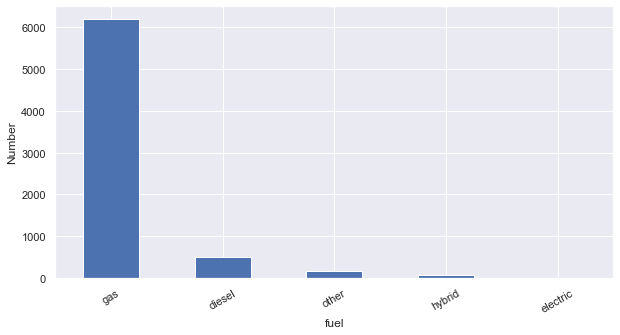

In [158]:
plt.figure(figsize=(10,5))
plt.xlabel("fuel")
plt.ylabel("Number")
title_status = data[["fuel"]].query("fuel.notnull()", engine="python")["fuel"].value_counts()
title_status.plot(kind="bar")
plt.xticks(rotation=30)


#### Replacing missing values of "fuel" column with most popular value

In [159]:
data = data.fillna(value={ "fuel":"gas" })
missing_value_percentage(data)
print("\ntotal rows count: " + str(data.shape[0]))

              percent_missing
price                0.000000
year                 0.000000
manufacturer         0.000000
model                0.000000
fuel                 0.000000
odometer             0.000000
title_status         0.000000
transmission         0.600171
type                13.703915
drive               18.791083
paint_color         24.535582
condition           34.838525
cylinders           36.024578
size                70.305802

total rows count: 6998


#### Analysing missing values for "transmission" column

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

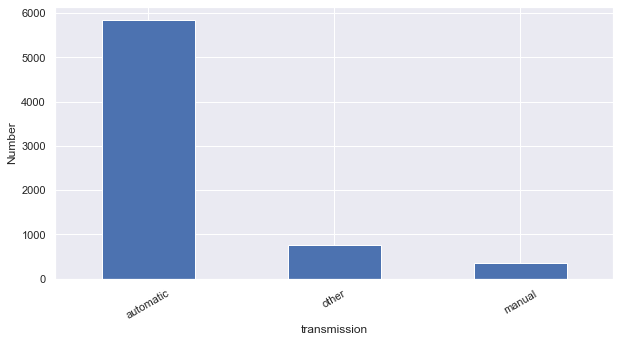

In [160]:
plt.figure(figsize=(10,5))
plt.xlabel("transmission")
plt.ylabel("Number")
title_status = data[["transmission"]].query("transmission.notnull()", engine="python")["transmission"].value_counts()
title_status.plot(kind="bar")
plt.xticks(rotation=30)


#### Replacing missing values of "transmission" column with most popular value

In [161]:
data = data.fillna(value={ "transmission":"automatic" })
missing_value_percentage(data)
print("\ntotal rows count: " + str(data.shape[0]))

              percent_missing
price                0.000000
year                 0.000000
manufacturer         0.000000
model                0.000000
fuel                 0.000000
odometer             0.000000
title_status         0.000000
transmission         0.000000
type                13.703915
drive               18.791083
paint_color         24.535582
condition           34.838525
cylinders           36.024578
size                70.305802

total rows count: 6998


#### Analysing missing values for "condition" column

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

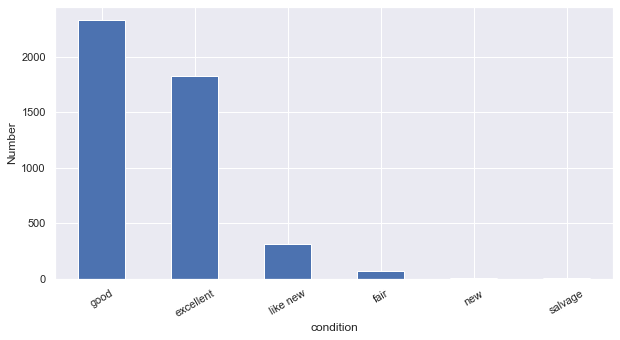

In [162]:
plt.figure(figsize=(10,5))
plt.xlabel("condition")
plt.ylabel("Number")
title_status = data[["condition"]].query("condition.notnull()", engine="python")["condition"].value_counts()
title_status.plot(kind="bar")
plt.xticks(rotation=30)


#### Dropping "condition" column

In [163]:
data = data.drop(columns=['condition'])
missing_value_percentage(data)
print("\ntotal rows count: " + str(data.shape[0]))

              percent_missing
price                0.000000
year                 0.000000
manufacturer         0.000000
model                0.000000
fuel                 0.000000
odometer             0.000000
title_status         0.000000
transmission         0.000000
type                13.703915
drive               18.791083
paint_color         24.535582
cylinders           36.024578
size                70.305802

total rows count: 6998


#### Analysing missing values for "paint_color" column

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

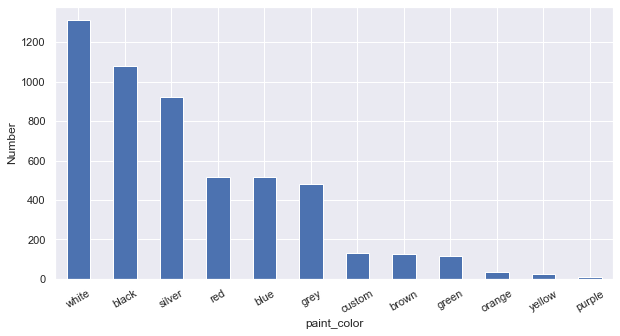

In [164]:
plt.figure(figsize=(10,5))
plt.xlabel("paint_color")
plt.ylabel("Number")
title_status = data[["paint_color"]].query("paint_color.notnull()", engine="python")["paint_color"].value_counts()
title_status.plot(kind="bar")
plt.xticks(rotation=30)

#### Dropping "paint_color" column

In [165]:
data = data.drop(columns=['paint_color'])
missing_value_percentage(data)
print("\ntotal rows count: " + str(data.shape[0]))

              percent_missing
price                0.000000
year                 0.000000
manufacturer         0.000000
model                0.000000
fuel                 0.000000
odometer             0.000000
title_status         0.000000
transmission         0.000000
type                13.703915
drive               18.791083
cylinders           36.024578
size                70.305802

total rows count: 6998


#### Analysing missing values for "cylinders" column

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

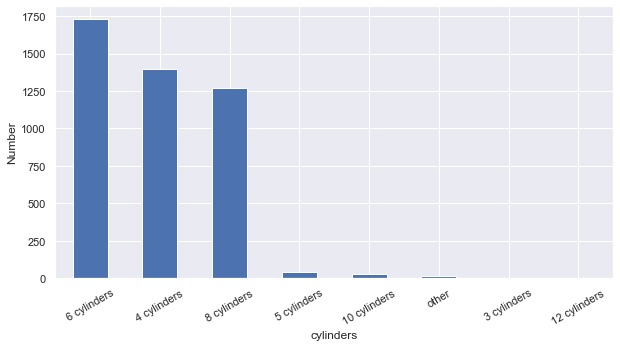

In [166]:
plt.figure(figsize=(10,5))
plt.xlabel("cylinders")
plt.ylabel("Number")
title_status = data[["cylinders"]].query("cylinders.notnull()", engine="python")["cylinders"].value_counts()
title_status.plot(kind="bar")
plt.xticks(rotation=30)

#### Dropping "cylinders" column

In [167]:
data = data.drop(columns=['cylinders'])
missing_value_percentage(data)
print("\ntotal rows count: " + str(data.shape[0]))

              percent_missing
price                0.000000
year                 0.000000
manufacturer         0.000000
model                0.000000
fuel                 0.000000
odometer             0.000000
title_status         0.000000
transmission         0.000000
type                13.703915
drive               18.791083
size                70.305802

total rows count: 6998


#### Analysing missing values for "drive" column

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

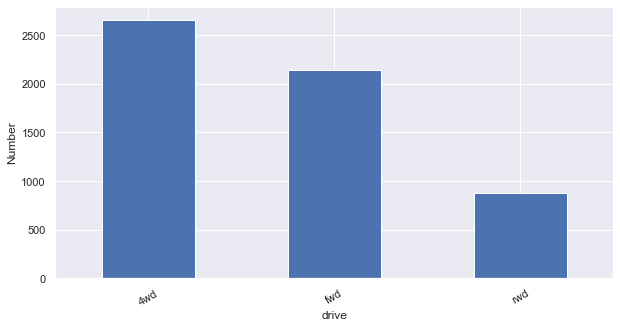

In [168]:
plt.figure(figsize=(10,5))
plt.xlabel("drive")
plt.ylabel("Number")
title_status = data[["drive"]].query("drive.notnull()", engine="python")["drive"].value_counts()
title_status.plot(kind="bar")
plt.xticks(rotation=30)

#### Dropping "drive" column

In [169]:
data = data.drop(columns=['drive'])
missing_value_percentage(data)
print("\ntotal rows count: " + str(data.shape[0]))

              percent_missing
price                0.000000
year                 0.000000
manufacturer         0.000000
model                0.000000
fuel                 0.000000
odometer             0.000000
title_status         0.000000
transmission         0.000000
type                13.703915
size                70.305802

total rows count: 6998


#### Analysing missing values for "type" column

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

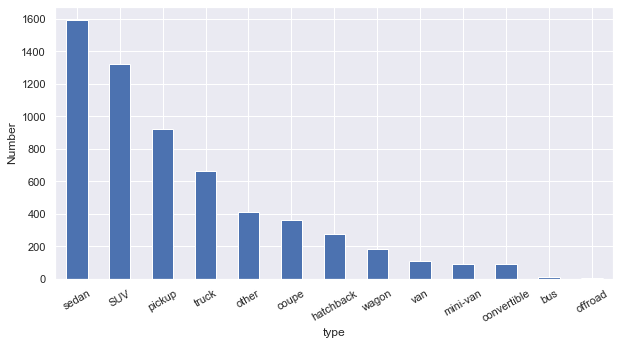

In [170]:
plt.figure(figsize=(10,5))
plt.xlabel("type")
plt.ylabel("Number")
title_status = data[["type"]].query("type.notnull()", engine="python")["type"].value_counts()
title_status.plot(kind="bar")
plt.xticks(rotation=30)

#### Dropping "type" column

In [171]:
data = data.drop(columns=['type'])
missing_value_percentage(data)
print("\ntotal rows count: " + str(data.shape[0]))

              percent_missing
price                0.000000
year                 0.000000
manufacturer         0.000000
model                0.000000
fuel                 0.000000
odometer             0.000000
title_status         0.000000
transmission         0.000000
size                70.305802

total rows count: 6998


#### Analysing missing values for "size" column

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

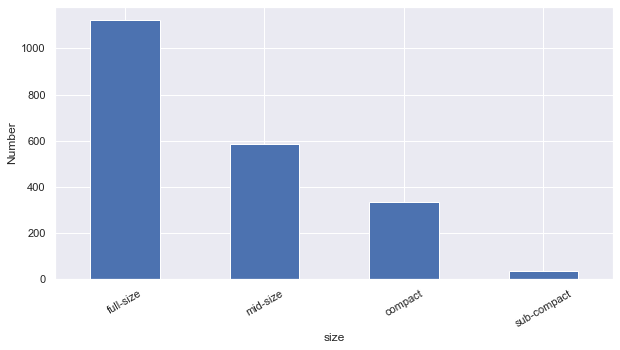

In [172]:
plt.figure(figsize=(10,5))
plt.xlabel("size")
plt.ylabel("Number")
title_status = data[["size"]].query("size.notnull()", engine="python")["size"].value_counts()
title_status.plot(kind="bar")
plt.xticks(rotation=30)

#### Dropping "size" column

In [173]:
data = data.drop(columns=['size'])
missing_value_percentage(data)
print("\ntotal rows count: " + str(data.shape[0]))

              percent_missing
price                     0.0
year                      0.0
manufacturer              0.0
model                     0.0
fuel                      0.0
odometer                  0.0
title_status              0.0
transmission              0.0

total rows count: 6998


### Exploratory data analysis

#### Exploring  relationship between odometer and price

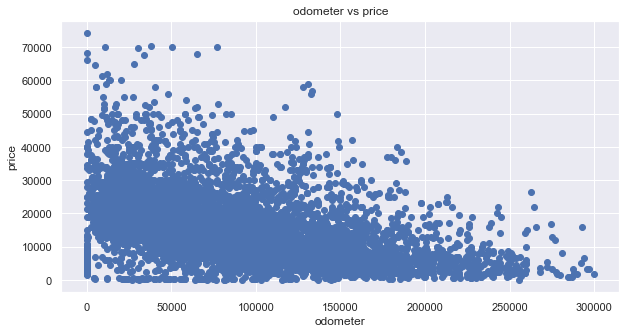

In [174]:
plt.figure(figsize=(10,5))
plt.title("odometer vs price")
plt.xlabel("odometer")
plt.ylabel("price")
plt.scatter(data["odometer"], data["price"])
plt.show()

#### Exploring  relationship between year and price

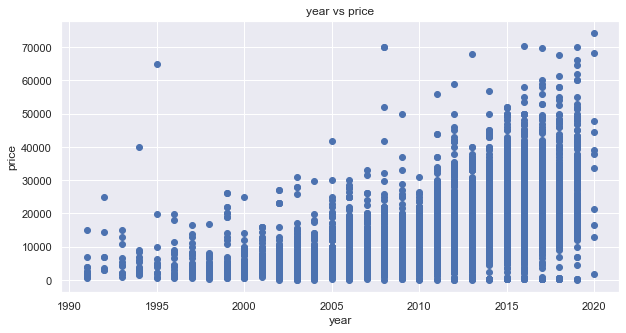

In [175]:
plt.figure(figsize=(10,5))
plt.title("year vs price")
plt.xlabel("year")
plt.ylabel("price")
plt.scatter(data["year"], data["price"])
plt.show()

#### Exploring  distribution of cars by "manufacturer"

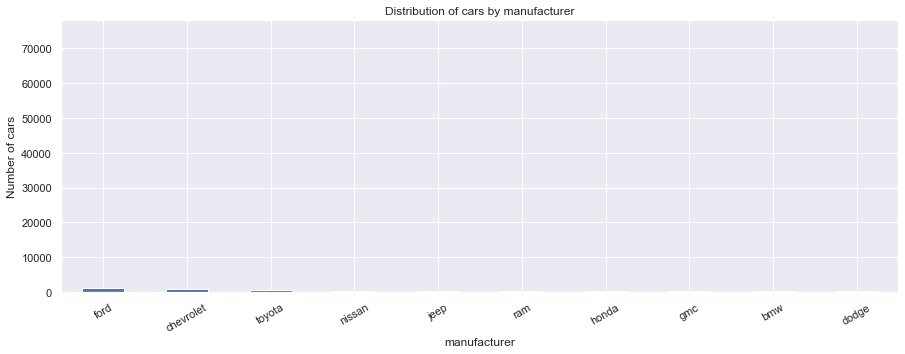

In [176]:
plt.figure(figsize=(15,5))
plt.title("Distribution of cars by manufacturer")
plt.xlabel("manufacturer")
plt.ylabel("Number of cars")
plt.scatter(data["year"], data["price"])
manufacturer_distribution = data["manufacturer"].value_counts()
manufacturer_distribution[0:10].plot(kind="bar")
plt.xticks(rotation=30)
plt.show()

#### Removing "price" column detected outliers

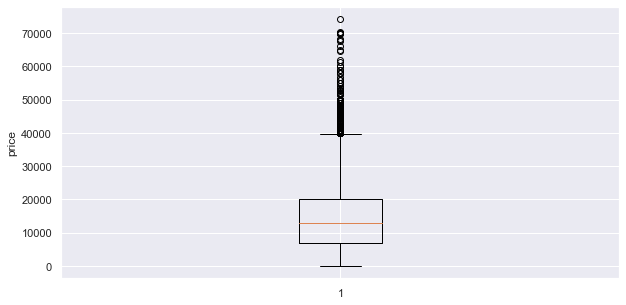

In [177]:
plt.figure(figsize=(10,5))
plt.ylabel("price")
plt.boxplot(data["price"])
plt.show()

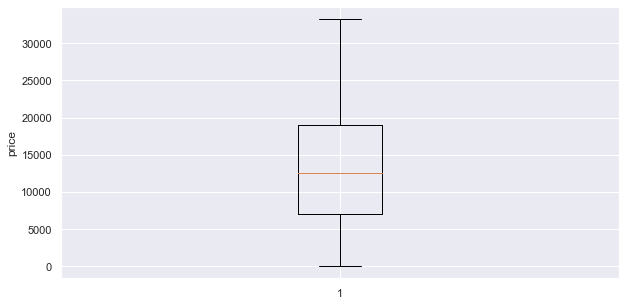

rows: 6614


In [178]:
data = reject_outliers(data, "price")

plt.figure(figsize=(10,5))
plt.ylabel("price")
plt.boxplot(data["price"])
plt.show()
print("rows: " + str(data.shape[0]))

## Applying machine learning models

### Pre-processing the data

#### Label encoding

In [179]:
from sklearn import preprocessing

manufacturer_label_encoder = preprocessing.LabelEncoder()
model_label_encoder = preprocessing.LabelEncoder()
manufacturer_label_encoder.fit(data[["manufacturer"]])
model_label_encoder.fit(data[["model"]])
fuel_category_dict = {"gas":0, "diesel":1, "other":2, "hybrid":3, "electric":4}
transmission_category_dict = {"automatic":0, "other":1, "manual":2}
title_status_category_dict = {"clean":0, "rebuilt":1, "salvage":2, "lien":3, "missing":4, "parts only":5}
fuel_category_inv_dict = {0:"gas", 1:"diesel", 2:"other", 3:"hybrid", 4:"electric"}
transmission_category_inv_dict = {0:"automatic", 1:"other", 2:"manual"}
title_status_category_inv_dict = {0:"clean", 1:"rebuilt", 2:"salvage", 3:"lien", 4:"missing", 5:"parts only"}

print(data.head(5))
print("\n")

data[["manufacturer"]] = manufacturer_label_encoder.transform(data[["manufacturer"]])
data[["model"]] = model_label_encoder.transform(data[["model"]])
data["fuel"] = data["fuel"].map(fuel_category_dict)
data["transmission"] = data["transmission"].map(transmission_category_dict)
data["title_status"] = data["title_status"].map(title_status_category_dict)

print(data.head(5))
print("\n")

#data[["manufacturer"]] = manufacturer_label_encoder.inverse_transform(data[["manufacturer"]])
#data[["model"]] = model_label_encoder.inverse_transform(data[["model"]])
#data["fuel"] = data["fuel"].map(fuel_category_inv_dict)
#data["transmission"] = data["transmission"].map(transmission_category_inv_dict)
#data["title_status"] = data["title_status"].map(title_status_category_inv_dict)

#print(data.head(5))
#print("\n")

   price    year manufacturer     model fuel  odometer title_status  \
0  10299  2012.0        acura        tl  gas   90186.0        clean   
2   9500  2011.0       jaguar        xf  gas   85000.0        clean   
3   3995  2004.0        honda   element  gas  212526.0        clean   
5  12995  2015.0          kia  sportage  gas   85127.0        clean   
6  10995  2014.0    chevrolet  traverse  gas  112383.0        clean   

  transmission  
0    automatic  
2    automatic  
3    automatic  
5    automatic  
6    automatic  


   price    year  manufacturer  model  fuel  odometer  title_status  \
0  10299  2012.0             0   1958     0   90186.0             0   
2   9500  2011.0            15   2156     0   85000.0             0   
3   3995  2004.0            12    697     0  212526.0             0   
5  12995  2015.0            17   1859     0   85127.0             0   
6  10995  2014.0             5   1998     0  112383.0             0   

   transmission  
0             0  
2     

/home/software2015/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/software2015/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [180]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = data.drop("price", axis=1)
y = data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
rfc = RandomForestClassifier(n_estimators=20)
rfc.fit(X_train,y_train)
rfc_predict = rfc.predict(X_test)
print(rfc_predict)
print(y_test)
accuracy_score(y_test, rfc_predict)

[11997  5495 26700 ... 18900 17000 15995]
6853    27990
5049     4995
2940    22900
612      7995
2870     6200
        ...  
6345     2500
445     23400
541     18900
3084    14999
1180    16000
Name: price, Length: 1323, dtype: int64


0.11715797430083144